In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from operator import itemgetter
import copy
import numpy as np

# intro: load example graph

/home/jaime/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/jaime/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


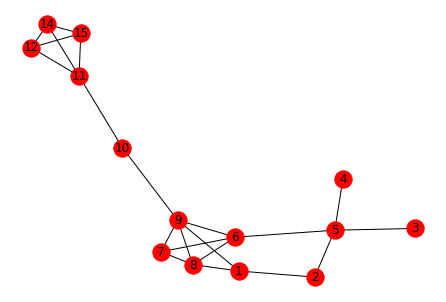

In [2]:
g = nx.Graph([])
g.add_edges_from([(1,2),(1,8),(1,9),
                  (5,2),
                  (5,3),
                  (5,4),
                  (5,6),
                  (6,7),
                  (6,8),
                  (6,9),
                  (7,8),
                  (7,9),
                  (8,9),
                  (9,10),
                  (10,11),
                  (11,14),
                  (11,15),
                  (11,12),
                  (14,15),
                  (15,12),
                  (12,14)
                 ])
nx.draw(g,with_labels=True)
plt.show()

# naive algo

In [3]:
def elbow(sorted_scores):
    sorted_scores = [np.array(i) for i in sorted_scores]
    #traduit de R, du code de l'article original
    if len(sorted_scores)<3:
        elbow_point=1
    else:
         # first point
        first_point = sorted_scores[0]
         # last point
        last_point =sorted_scores[-1]
        first_point-last_point
        
        # compute distance between each point of "sorted_scores" and the "first-last" line
        distances = []
    
        for index,point in enumerate(sorted_scores):
            point= np.array(point)
            #calculate distance between the point and the line drawn between first point and last point
            d=np.cross(last_point-first_point,point-first_point)/np.linalg.norm(last_point-first_point)
            distances.append(abs(d))
            
            
        if np.max(distances)>0:
            x_elbow=sorted_scores[np.argmax(distances)]
        else :
            x_elbow=sorted_scores[0]
            
        return x_elbow


In [4]:
def get_density(g):
    e = g.number_of_edges()
    v = g.number_of_nodes()

    if v !=0:
        density = abs(e)/(abs(v)*(abs(v)-1))
        return density
    else : 
        return None

In [5]:
def dens_method(k_core_decomp):
    D=[]
    for i in range(max(k_core_decomp.values())):
        nodes_indexes = [k for k, v in k_core_decomp.items() if v >i]
        g_small = g.subgraph(nodes_indexes)
        D.append(get_density(g_small))
    return elbow([i for i in enumerate(D)])[0]+1 # +1 as we started counting at zero

In [6]:
def get_keywords(g):
    k_core_decomp = nx.core_number(g) # replace by custom made function
    k_core_value_of_keywords = dens_method(k_core_decomp)
    keywords = [k for k, v in k_core_decomp.items() if v >= k_core_value_of_keywords]
    return keywords

In [7]:
get_keywords(g)

[1, 2, 8, 9, 5, 6, 7, 10, 11, 14, 15, 12]

# Now in Cython

## time

In [8]:
%timeit get_keywords(g)

933 µs ± 75.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## memory usage

In [9]:
# pip install memory_profiler

In [10]:
%load_ext memory_profiler

In [11]:
%memit get_keywords(g)

peak memory: 117.79 MiB, increment: 0.05 MiB
